This notebook is the first coding homework in the Deep Learning class

It is about photo classification using the Cifar10 dataset provided by Keras

I used a regular CNN model with data augmentation to increase the size of the dataset.

In [1]:
from keras.datasets import cifar10
import numpy

# load the cifar10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# normalize the data
x_test  = x_test /x_train.max()
x_train = x_train/x_train.max()

print('shape of x_train: ' + str(x_train.shape))
print('shape of y_train: ' + str(y_train.shape))
print('shape of x_test: ' + str(x_test.shape))
print('shape of y_test: ' + str(y_test.shape))
print('number of classes: ' + str(numpy.max(y_train) - numpy.min(y_train) + 1))

Using TensorFlow backend.


shape of x_train: (50000, 32, 32, 3)
shape of y_train: (50000, 1)
shape of x_test: (10000, 32, 32, 3)
shape of y_test: (10000, 1)
number of classes: 10


In [2]:
# encode the labels to one hot encoded data
def to_one_hot(y, num_class=10):
    results = numpy.zeros((len(y), num_class))
    for i in range(0, len(y)):
        results[i][int(y[i])] = 1.
    return results

y_train_vec = to_one_hot(y_train)

print('Shape of y_train_vec: ' + str(y_train_vec.shape))

print(y_train[0])
print(y_train_vec[0])

Shape of y_train_vec: (50000, 10)
[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [3]:
# divide the dataset to training and validation

rand_indices = numpy.random.permutation(50000)
train_indices = rand_indices[0:40000]
valid_indices = rand_indices[40000:50000]

x_val = x_train[valid_indices, :]
y_val = y_train_vec[valid_indices, :]

x_tr = x_train[train_indices, :]
y_tr = y_train_vec[train_indices, :]

print('Shape of x_tr: ' + str(x_tr.shape))
print('Shape of y_tr: ' + str(y_tr.shape))
print('Shape of x_val: ' + str(x_val.shape))
print('Shape of y_val: ' + str(y_val.shape))

Shape of x_tr: (40000, 32, 32, 3)
Shape of y_tr: (40000, 10)
Shape of x_val: (10000, 32, 32, 3)
Shape of y_val: (10000, 10)


In [4]:
# create the ANN model

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, LeakyReLU, Dropout, regularizers
from keras.layers import BatchNormalization, Activation
from keras.models import Sequential

model = Sequential()
model.add(BatchNormalization(input_shape=x_train.shape[1:]))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 32, 32, 3)         12        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_3 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
__________

In [5]:
# Augment the data

from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

learning_rate = 0.0001 # to be tuned!

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=learning_rate),
              metrics=['acc'])

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

datagen.fit(x_tr)

print('Shape of y_train_vec: ' + str(x_tr.shape))

Shape of y_train_vec: (40000, 32, 32, 3)


Epoch 1/40
1250/1250 [==============================] - 27s 22ms/step - loss: 1.6976 - acc: 0.3936 - val_loss: 1.2749 - val_acc: 0.5374
Epoch 2/40
1250/1250 [==============================] - 19s 16ms/step - loss: 1.3486 - acc: 0.5162 - val_loss: 1.2656 - val_acc: 0.5526
Epoch 3/40
1250/1250 [==============================] - 19s 15ms/step - loss: 1.2031 - acc: 0.5697 - val_loss: 1.0318 - val_acc: 0.6260
Epoch 4/40
1250/1250 [==============================] - 20s 16ms/step - loss: 1.1011 - acc: 0.6080 - val_loss: 0.9678 - val_acc: 0.6571
Epoch 5/40
1250/1250 [==============================] - 21s 16ms/step - loss: 1.0238 - acc: 0.6375 - val_loss: 0.9628 - val_acc: 0.6669
Epoch 6/40
1250/1250 [==============================] - 20s 16ms/step - loss: 0.9650 - acc: 0.6572 - val_loss: 1.0127 - val_acc: 0.6500
Epoch 7/40
1250/1250 [==============================] - 19s 15ms/step - loss: 0.9154 - acc: 0.6740 - val_loss: 0.7764 - val_acc: 0.7271
Epoch 8/40
1250/1250 [==========================

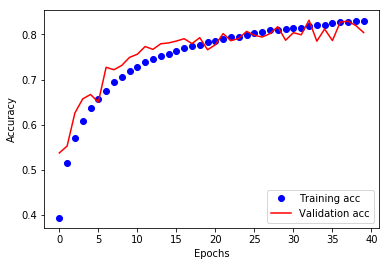

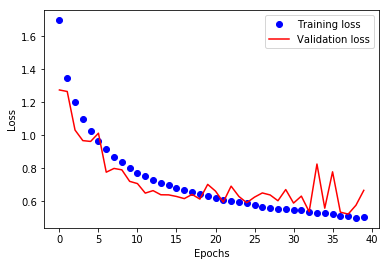

In [6]:
# fit the model

history = model.fit_generator(datagen.flow(x_tr, y_tr, batch_size=32), steps_per_epoch=1250, epochs=40, 
                              validation_data=(x_val, y_val))

import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [7]:
# compute the test

y_test_vec = to_one_hot(y_test)
loss_and_acc = model.evaluate(x_test, y_test_vec)
print('loss = ' + str(loss_and_acc[0]))
print('accuracy = ' + str(loss_and_acc[1]))

10000/10000 [==============================] - 2s 173us/step
loss = 0.6653852187871933
accuracy = 0.8018
